# Introduction to Exploratory Data Analysis in Python

### <font color=indigo>A Half-Day Seminar on EDA Libraries in Python </font>

# Part 1: Python Libraries

Base python is fairly limited:

* it's very slow
* it non-vectorized
    * all values are single values
    * processing datasets requires loops
* its designed for software engineering

Python has been extended to include access to tools which are not actually written in python; and which have state-of-the-art performance. 

## How do I get access to python data processing tools?

The `import` keyword loads a *library* (toolset), and makes it available within your program.

The `as` keyword allows us to rename it, and use an abbreviation. 

It's common, for example, to abbreviate `numpy` to `np`,

In [1]:
import numpy as np

## Library Example: What is NumPy?

`NumPy` means "numerical python", it's *for* very fast pure numerical computation. In particular, it is no table-like or spreadsheet-like, it's matrix-like.

It's default datastucture is called an "array" (a *fast* collection of numerical data),

In [13]:
one_million = list(range(0, 1_000_000))

In [14]:
%%timeit

total = 0 
for n in one_million:
    total += n

43.9 ms ± 307 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
fast_numbers = np.array(one_million)

In [16]:
%%timeit
fast_numbers.sum()

464 µs ± 6.31 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In this case `numpy` is `100x` faster than python,

In [17]:
43E-3 / 464E-6

92.67241379310344

## What is a library? 

There are two kinds of library:
* written in python that contain shared code
* written in other langs that "extend" python
    * these are the data science libraries

## Why plug-in data science libraries *into* python?

The code behind, eg,. numpy, is extremely advanced and complex. It is has to be optimized for every processor, platform, ... to be *very fast*. It has to be aware of how the memory/cpu of the machine *really work*.

By plugging these into python, we get the benefit of fast systems without difficult concepts/syntax/programs. 

## What are the most important tools for data processing & exploratory analysis?

`numpy` for fast numerical computing,

In [18]:
import numpy as np

In [29]:
np.random.normal(10, 5, 10_001).mean()

10.023509965575547

`pandas` for fast tabular processing (excel-like, sql-like),

In [19]:
import pandas as pd

In [30]:
# DataFrame ~= Spreadsheet ~= Table
pd.DataFrame({
    'Age': [20, 30, 40]
}) 

,Age
0,20
1,30
2,40


`seaborn` for simple visualization,

In [20]:
import seaborn as sns

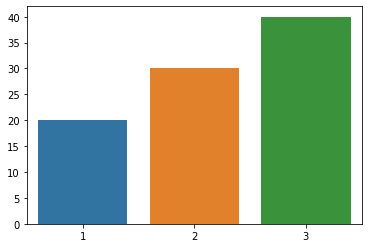

In [32]:
sns.barplot(x=[1, 2, 3], y=[20, 30, 40])

Aside, `plotly` for more advanced visuals,

In [24]:
import plotly.express as px

In [40]:
px.bar(x=[1, 2, 3], y=[20, 30, 40], height=250, width=350)

`networkx` for network/graph analysis, eg., social networks, 

In [21]:
import networkx as nx

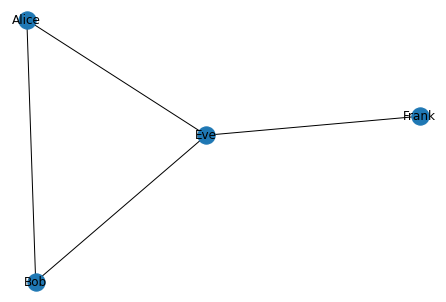

In [45]:
G = nx.from_edgelist([
    ('Frank', 'Eve', {'msg': 5}),
    ('Alice', 'Eve', {'msg': 5}),
    ('Alice', 'Bob', {'msg': 15}),
    ('Bob', 'Eve', {'msg': 2})
])

nx.draw(G, with_labels=True)

In [48]:
nx.betweenness_centrality(G) # how *between* other people is each person

{'Frank': 0.0, 'Eve': 0.6666666666666666, 'Alice': 0.0, 'Bob': 0.0}

`sklearn` for simple machine learning,

In [22]:
import sklearn 

`sklearn` is a collection of libraries, when importing from `sklearn`, we typically import from a specific one.

Here we import from the `neighbors` library, and a *specific* tool called a `KNeighborsClassifier`, 

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
X = [ 
    (18, 1.8), 
    (20, 1.75), 
    (30, 1.65),
    (19, 1.81), 
    (23, 1.55), 
    (60, 1.65),
] # [ (Age, Height) ]

y = ['M', 'M', 'F', 'M', 'F', 'M'] # 4/6 is M

model = KNeighborsClassifier().fit(X, y)

In [57]:
X_new = [ (20, 1.55), (40, 1.9) ]
y_est = model.predict(X_new)

In [58]:
y_est

array(['M', 'M'], dtype='<U1')

##### ASIDE: does this always predict `M` ?

In [61]:
X_test = np.c_[np.arange(0, 100), np.arange(1, 2, 0.01)]

In [62]:
model.predict(X_test)

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M'], dtype='<U1')

`tensorflow` for neural networks,

In [23]:
import tensorflow as tf

## Aside: How do I find out what functions are available?

Google for the documentation of the library, or...

In [66]:
from sklearn import tree

In [67]:
dir(tree)

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_classes',
 '_criterion',
 '_export',
 '_reingold_tilford',
 '_splitter',
 '_tree',
 '_utils',
 'export_graphviz',
 'export_text',
 'plot_tree']

In [69]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



## Exericse (15 min)

* import 
    * numpy
    * seaborn
    * pandas 
    * networkx
    
* with numpy, 
    * generate 100 random numbers and show the mean
        * `np.random.normal(10, 5, 100).mean()`
    * generate 100 random choices of 'M', 'F'
        * `np.random.choice(['H', 'T'], 100)`
* with seaborn
    * draw a scatterplot
        * `sns.scatterplot(x=[2, 3, 5], y=[2, 3, 4])`
* with pandas,
    * create a table,
        * `pd.DataFrame({'From': ['Alice', 'Eve'], 'To': ['Bob', 'Dan']})`
* with networkx,
    * draw a graph, 
    * ```python
        G = nx.from_edgelist([
            ('Frank', 'Eve', {'msg': 5}),
            ('Alice', 'Eve', {'msg': 5}),
            ('Alice', 'Bob', {'msg': 15}),
            ('Bob', 'Eve', {'msg': 2})
        ])

    nx.draw(G, with_labels=True)
```
        

----

# Part 2: Exploratory Data Analysis

Perhaps the most important general data processing library in python is *pandas*.

To illustrate this library we will look exploratory data analysis.

## What is EDA?

The goal of EDA is to get a comprehensive understanding of a dataset(s) before modelling them. 

When we're modelling we always making assumptions about the underlying data. One primary goal of EDA is to ensure these assumptions hold, ie., to avoid leaping into modelling and producing nonesense.

The result of modeling should, in almost all cases, essentially be known *before* modelling. 

$(X, y) \rightarrow EDA \rightarrow f(X)$

The role of a model is to give specific (precise) estimates; the general solution should be fairly obvious before modelling.

##### Aside: two philosophies regarding "Data"

* Data-first (<- FALSE)
    * a typical presumption behind machine learning
        * automatically produce models from data
    * the data can produce reliable models "of itself" without many meaningful assumptions
* Mind-first (interpretation-first)
    * the data is meaningless and unreliable without prior interpretation (& meaningful assumption)
    * eg., 
        * the process which generates data for a given column does so according to the normal distribution
    
Eg., consider the light hitting your eyes. There is no way of using this light to reconstruct a 3D model of the room you are in. The light *does not contain this information*. 

Animals use light information *to disambiguate* **prior** interpretations (ie., prior 3d models). 

<img src=http://1.bp.blogspot.com/_u-LXMEsMK5Y/TBBDO_n7dLI/AAAAAAAAABw/6N_puS2taAQ/s1600/ames+room.jpg />


This isn't *really* an "illusion": we're always doing this! We come to the wrong conclusions, but seeing always works this way.

EDA *is necessarily human*, **we** are applying concepts (ie., models) derived from the world *to* data in order to ensure it is coherent. 

<img src="https://www.thespruce.com/thmb/EvdqR5HNV6Ev9RBv8qGqHNE8DoM=/3636x2045/smart/filters:no_upscale()/how-to-arrange-living-room-furniture-1976578-hero-c99074dcad854b669b91652046a39203.jpg" />

Above, we assume that the railings meeting the wall are *actually* perpendicular, and therefore **we** impart "depth" to the image which it, itself, lacks.

### Aside: What does `meaningful assumption` mean?

Any assumption about the data-generating process. Any assumptions about where data comes from. These assumptions are necessary to build accurate models of reality from data.

In animals we are able to make these assumptions about the origin of data using our bodies, in the simple case. The child touching the hot fireplace is able to use their bodies' reaction to heat to supplement causal assumptions about the origin of the "sensory data". 

Video game systems which generate 3D words do so via models made in this manner.

Financial models routinely also begin with assumptions about the data generating process, eg., 

$\frac{d Price(t)}{dt} = Trend(t) + Variation(t)RandomKick$

## How do I load pandas?

In [77]:
import pandas as pd

## How do I load a dataset into python?

`pd.read_excel` reads from an excel file,

In [81]:
ti = pd.read_excel('titanic.xlsx')

## How do I show a sample of rows?

In [86]:
ti.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
700,1,1,female,18.0,1,0,227.525,C,First,woman,False,C,Cherbourg,yes,False
226,1,2,male,19.0,0,0,10.500,S,Second,man,True,NaN,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False


This is a random sample; run the cell again to get other rows, at random.

## How do I show the first three rows?

In [83]:
ti.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


Sometimes datasets are structured so that the first set of rows are quite similar. I prefer `.sample`. 

## How do I understand the structure of a dataset?

The `.info` command gives you structural information about your **DataFrame**,

```
RangeIndex: NUMBER OF ROWS

Data columns (total 15 columns):

 #   Column       Non-Null Count               Dtype  
---  ------       --------------               -----  
 0   COLUMN NAME     NUMBER OF ENTRIES        DATATYPE  

 
 ```

In [88]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Notice `deck` has `203` entires, and `survived` has `891` -- this means that `deck` has a lot of missing data.


The datatype column lists the type of data, where `object` (roughly,) means *category*.

## How do I get descriptive statistics?

By default, `describe` produces descriptive stats on all numeric columns,

In [90]:
ti.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [92]:
ti.describe(include=['bool', 'object']) # bool = 2-category, object = n-category

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


With this form, `.describe` gives us count data on the discrete columns.

## How do I get column-specific stats?

The count of entires of each sex,

In [95]:
ti['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

The general rate of survivial on the titanic, 

In [97]:
ti['survived'].mean()

0.3838383838383838

## How do I select a column?

`DATASET[   COLUMN  ]  .  FUNCTION()`

In [98]:
ti['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [105]:
ti['age'].sample(1)

738   NaN
Name: age, dtype: float64

#### Aside: The Law of Large Numbers

If we keep sampling a small group, eventually, they'll look like the big group...

In [137]:
(ti['age'].sample(10).mean() +
ti['age'].sample(10).mean() +
ti['age'].sample(10).mean() +
ti['age'].sample(10).mean() +
ti['age'].sample(10).mean())/5

29.666805555555555

In [121]:
ti['age'].mean()

29.69911764705882

## Exercise (30 min)

1. Create your own notebook 
2. Start with the code below
3. Produce a report on either of the following datasets
    * `.info()`
    * `.describe()`
    * `.value_counts()` for individual columns
    * show `.sample()`s of rows
    * EXTRA: consider the following,
        * `.corr()` produces a table of correlations
        *  `titanic['survived'].groupby(titanic['sex']).mean()`

In [152]:
import seaborn as sns

tips = sns.load_dataset('tips')
titanic = sns.load_dataset('titanic')

In [153]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [154]:
titanic['survived'].groupby(titanic['pclass']).mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

---

# Part 3: Querying with Pandas

## Recap: How do I select a column?

In [155]:
ti['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


## How do I select multiple columns?

You can select multiple columns using a list of column names,

In [149]:
cols = ['age', 'fare']

ti[ cols ].mean()

age     29.699118
fare    32.204208
dtype: float64

In [158]:
ti[                 # FIND, SELECT
    ['age', 'fare'] # LIST
]

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [160]:
ti[['age', 'sex']]

,age,sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
...,...,...
886,27.0,male
887,19.0,female
888,NaN,female
889,26.0,male


## How do I filter rows?

The `.loc` indexer (selecter, finder) allows to filter rows and columns,

In [161]:
row_index = [0, 5, 10]
col_index = ['age', 'sex']

ti.loc[ row_index ,  col_index ]

,age,sex
0,22.0,male
5,NaN,male
10,4.0,female


## How do I filter rows by a condition?

In `pandas` you can compare entire columns to single values,

In [163]:
condition = ti['sex'] == 'female'

This will run the comparison on every row,

In [166]:
condition

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: sex, Length: 891, dtype: bool

In [168]:
fares_for_women = ti.loc[condition, 'fare']

In [169]:
fares_for_women.mean()

44.47981783439487

We put all these ideas togther and obtain a subset of rows and a subset of columns all in one go, 

In [176]:
ti.loc[ 
    (ti['sex'] == 'male'),   # ROW CONDITION
    ['fare', 'survived']   # COLUMN LIST
].mean()

fare        25.523893
survived     0.188908
dtype: float64

ie., 

```python

DATAFRAME.FILTER[ 
    ROW_CONDITION, COLUMN_SELECTION 
].FUNCTION()


ti.loc[ 
    ti['sex'] == 'male', 
    ['fare', 'survived'] 
].mean()

```

##### Aside: formatting

Between any pair of brackets you can use as much whitespace (ie., blank lines) as you like.

Personally, I mostly prefer asymetric brackets with indention and a visual column of text,

In [172]:
1 + 2 + 3 + 43 + 5

54

In [174]:
( 1  + 
  2  + 
  3  + 
  43 + 
  5
)

54

## How do I expand the filters?

... TODO ...

## How do I group and aggregate data?

In [177]:
ti['survived'].groupby(ti['pclass']).mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [178]:
groups = [ti['pclass'], ti['sex']]

ti['survived'].groupby(groups).mean()

pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

In [179]:
ti['survived'].groupby(ti['sex']).agg(['mean', 'median', 'count'])

,mean,median,count
sex,,,
female,0.742038,1,314
male,0.188908,0,577


General principal in `pandas`, if you can query for a single, you can query for a list (ie., several). 

## Aside: How do I query by column type?

In [184]:
ti.select_dtypes(include=['bool', 'object'])

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


## How do I prepare a dataset?

In [186]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


We can drop columns,

In [187]:
ti_cleaned = ti.drop(columns=['deck'])

We can drop rows,

In [188]:
ti_cleaned = ti_cleaned.dropna()

We can inspect, or count, the amount of missing data using a combination of `.isna()` and `.sum()`, 

In [192]:
ti.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [193]:
ti_cleaned.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

##### Aside: Checking for bias

In [196]:
ti['survived'].groupby([ti['pclass'], ti['sex']]).agg(['mean', 'std'])

mean       std
pclass sex                       
1      female  0.968085  0.176716
       male    0.368852  0.484484
2      female  0.921053  0.271448
       male    0.157407  0.365882
3      female  0.500000  0.501745
       male    0.135447  0.342694

In [197]:
ti_cleaned['survived'].groupby([ti_cleaned['pclass'], ti_cleaned['sex']]).agg(['mean', 'std'])

mean       std
pclass sex                       
1      female  0.963855  0.187784
       male    0.396040  0.491512
2      female  0.918919  0.274823
       male    0.151515  0.360375
3      female  0.460784  0.500921
       male    0.150198  0.357973

# Part 4: Visualization

## What library do I use for creating simple visuals?

In [198]:
import seaborn as sns

## How do I visualize a dataset?

```
SNS.VISUALPLOT(x=DATASET, y=DATASET, options=...)
```

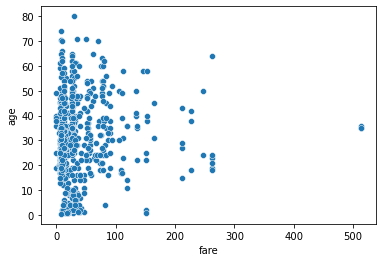

In [199]:
sns.scatterplot(x=ti['fare'], y=ti['age'])

## How do I customize a plot?

In [200]:
ti.sample(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
345,1,2,female,24.0,0,0,13.0,S,Second,woman,False,F,Southampton,yes,True


Below we supply `ti['age']` as the `x`s,... and `ti['pclass']` as the *size* of the points; and `ti['survived']` as their color...

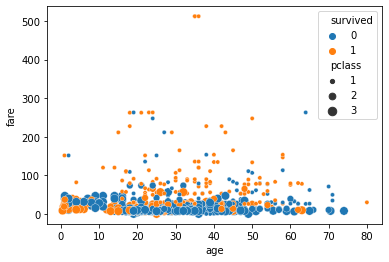

In [205]:
sns.scatterplot(x=ti['age'], y=ti['fare'], size=ti['pclass'], hue=ti['survived'])

## How do I visualize categorical data?

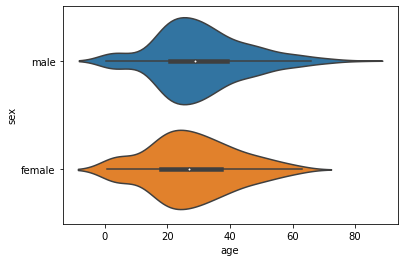

In [208]:
sns.violinplot(x=ti['age'], y=ti['sex'])

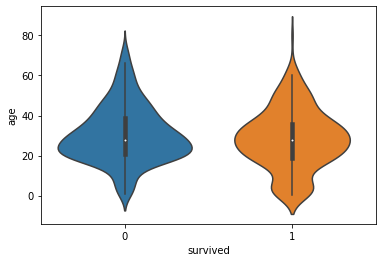

In [211]:
sns.violinplot(x=ti['survived'], y=ti['age'])

## Aisde: Plotly

In [212]:
import plotly.express as px

In [223]:
px.scatter(x=ti['age'], y=ti['pclass'], size=ti['fare'], color=ti['survived'])

In [216]:
px.violin(x=ti['age'], y=ti['sex'], box=True)

---

## Exercise (25 min)

###  Part 1: Pandas Querying

* using `groupby` *explain* the relationship between:
    * sex, fare, age, pclass, city and *the rate of survival*

### Part 2: Visualization
* use visuals to present the same information you discovered above

* `sns.barplot`
* `sns.histplot`
* `sns.violinplot`
    * `sns.boxplot`
* `sns.scatterplot`
* `sns.lineplot`

* formula:
    * `sns.plotname(x=dataset, y=dataset)`
    
### Part 3: EXTRA
* review https://seaborn.pydata.org/examples/index.html
* review https://plotly.com/python/basic-charts/
* exercise: copy/paste some examples and modify

## Aside: How do I save data with pandas?

In [142]:
import seaborn as sns

Seaborn allows you to download datasets and gives you a pandas dataframe,

In [144]:
df = sns.load_dataset('tips')

Pandas tracks a secondary index which you almost never want to save,

In [145]:
df.to_csv('tips.csv', index=False)

You can also save to a database,

```
df.to_sql(..., ...)
```

In [146]:
(
    sns
    .load_dataset('titanic')
    .to_excel('titanic.xlsx', index=False)
)